In [152]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt

with open('citcount_to_citbalance.json') as f:
    citcnt2bal = json.load(f)

In [38]:
X = [t[0] for t in citcnt2bal]
Yabs = [t[1] for t in citcnt2bal]
Yrel = [y/X[i] for i, y in enumerate(Yabs)]

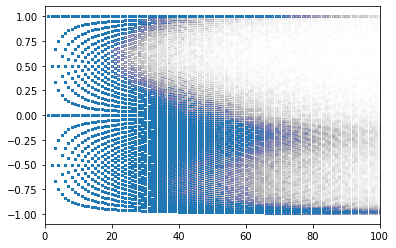

In [56]:
plt.plot(X, Yrel, '.', alpha=.0025)
axes = plt.gca()
axes.set_xlim([0, 100])
plt.show()

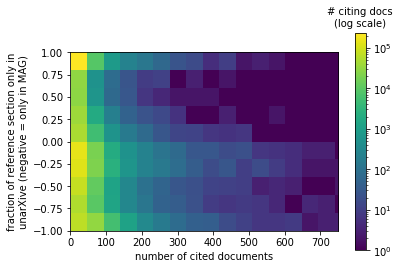

In [149]:
from matplotlib.colors import LogNorm
from matplotlib import cm
import copy

plt.cla()
axes = plt.gca()
axes.set_xlim([0, 750])
axes.set_ylim([-1, 1])
heatmap, xedges, yedges = np.histogram2d(X, Yrel, bins=[50, 10])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

my_cmap = copy.copy(cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad(my_cmap.colors[0]) # set "bad values" (0 in this case b/c of the log scale, to the lowest color)

plt.imshow(heatmap.T, extent=extent, origin='lower', norm=LogNorm(), aspect=250, interpolation='nearest', cmap=my_cmap)
plt.xlabel('number of cited documents')
plt.ylabel('fraction of reference section only in\nunarXive (negative = only in MAG)')
plt.title('')
clb = plt.colorbar()
clb.set_label('# citing docs\n(log scale)', labelpad=-32, y=1.12, rotation=0)
plt.savefig('citcount2balance.svg', dpi=300)

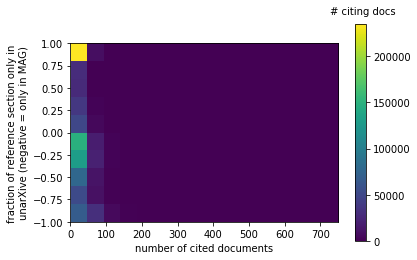

In [151]:
# non log scale version
plt.cla()
axes = plt.gca()
axes.set_xlim([0, 750])
axes.set_ylim([-1, 1])
heatmap, xedges, yedges = np.histogram2d(X, Yrel, bins=[50, 10])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

my_cmap = copy.copy(cm.get_cmap('viridis')) # copy the default cmap
my_cmap.set_bad(my_cmap.colors[0]) # set "bad values" (0 in this case b/c of the log scale, to the lowest color)

plt.imshow(heatmap.T, extent=extent, origin='lower', aspect=250, interpolation='nearest', cmap=my_cmap)
plt.xlabel('number of cited documents')
plt.ylabel('fraction of reference section only in\nunarXive (negative = only in MAG)')
plt.title('')
clb = plt.colorbar()
clb.set_label('# citing docs', labelpad=-48, y=1.08, rotation=0)
plt.savefig('citcount2balance_nonlog.svg', dpi=300)